In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from gradient_utils import GradientUtils
import pandas as pd
from plot_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load images
imgs_sw = imread(
    "/group/jug/aman/results/Results_usplit_64/PAVIA_ATN/windowed/pred_test_dset_pavia_usplit_windowed.tiff"
).transpose(0, 2, 3, 1)

imgs_og = imread(
    "/group/jug/aman/results/Results_usplit_64/PAVIA_ATN/original/pred_test_dset_pavia_usplit_og_64.tiff"
).transpose(0, 2, 3, 1)

In [3]:
# create instances
grad_utils_sw = GradientUtils(imgs_sw, tile_size=32)
grad_utils_og = GradientUtils(imgs_og, tile_size=32)

# extract gradients modularly
grad_sw = grad_utils_sw.get_gradients_at("edge", channels = 1)
grad_sw_mid = grad_utils_sw.get_gradients_at("middle", channels = 1)
grad_og = grad_utils_og.get_gradients_at("edge", channels = 1)
grad_og_mid = grad_utils_og.get_gradients_at("middle", channels = 1)

# shared bin edges
_, bin_edges = np.histogram(
    np.concatenate([grad_og_mid, grad_sw_mid, grad_og, grad_sw]),
    bins=2000)

In [4]:
# re-init with shared bins
grad_utils_sw = GradientUtils(imgs_sw, tile_size=32, bin_edges=bin_edges)
grad_utils_og = GradientUtils(imgs_og, tile_size=32, bin_edges=bin_edges)

In [5]:
data = {
    "Original": grad_utils_og.get_peakiness_scores()[-1],
    "Sliding Window": grad_utils_sw.get_peakiness_scores()[-1]
}
df = pd.DataFrame(data, index=["Middle - Edge"])
df['Difference'] = df['Original'] - df['Sliding Window']
print("Peakiness Scores of Difference of Histograms:\n(Lower is better)")
print(df.to_string())


AttributeError: 'GradientUtils' object has no attribute 'histogram_edges'

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5))

# Row 1 = Not-normalized (raw gradients)
plot_multiple_hist(
    axs[0],
    arrays=[grad_og, grad_og_mid],
    labels=["OG (raw)", "Gradients at middle of tiles"],
    colors=["blue", "black"],
    title="Gradients of OG vs In the Middle of Tiles"
)

plot_multiple_hist(
    axs[1],
    arrays=[grad_sw_mid, grad_sw],
    labels=["Gradients at middle of tiles", "Sliding Window (raw)"],
    colors=["black", "red"],
    title="Gradients of SW vs In the Middle of Tiles"
)

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(25, 12))

#
plot_multiple_bar(
    ax[0],
    arrays=[grad_utils_sw.histogram_edges, grad_utils_sw.histogram_middle],
    labels=["SW: Edge of Tiles", "SW: Middle of Tiles"],
    colors=["red", "black"],
    title="Sliding Window Gradients: Edge vs Middle",
    smooth_window=100,
    bin_edges=bin_edges[:-1]
)


plot_multiple_bar(
    ax[1],
    arrays=[grad_utils_og.histogram_edges, grad_utils_og.histogram_middle],
    labels=["OG: Edge of Tiles", "OG: Middle of Tiles"],
    colors=["blue", "black"],
    title="Original Image Gradients: Edge vs Middle",
    smooth_window=100,
    bin_edges=bin_edges[:-1]
)

plot_multiple_bar(
    ax[2],
    arrays=[grad_utils_og.histogram_middle - grad_utils_og.histogram_edges, 
            grad_utils_sw.histogram_middle - grad_utils_sw.histogram_edges],
    labels=["OG: Middle - Edge", "SW: Middle - Edge"],
    colors=["blue", "red"],
    title="Histogram Differences (Middle minus Edge) per Image",
    smooth_window=100,
    bin_edges=bin_edges[:-1]
)

plot_multiple_bar(
    ax[3],
    arrays=[grad_utils_sw.histogram_edges - grad_utils_og.histogram_edges, 
            grad_utils_sw.histogram_middle - grad_utils_og.histogram_middle],
    labels=["Edge: SW - OG", "Middle: SW - OG"],
    colors=["orange", "black"],
    title="Histogram Differences Between SW and OG at Tile Positions",
    smooth_window=100,
    bin_edges=bin_edges[:-1]
)

plt.tight_layout()
plt.show()

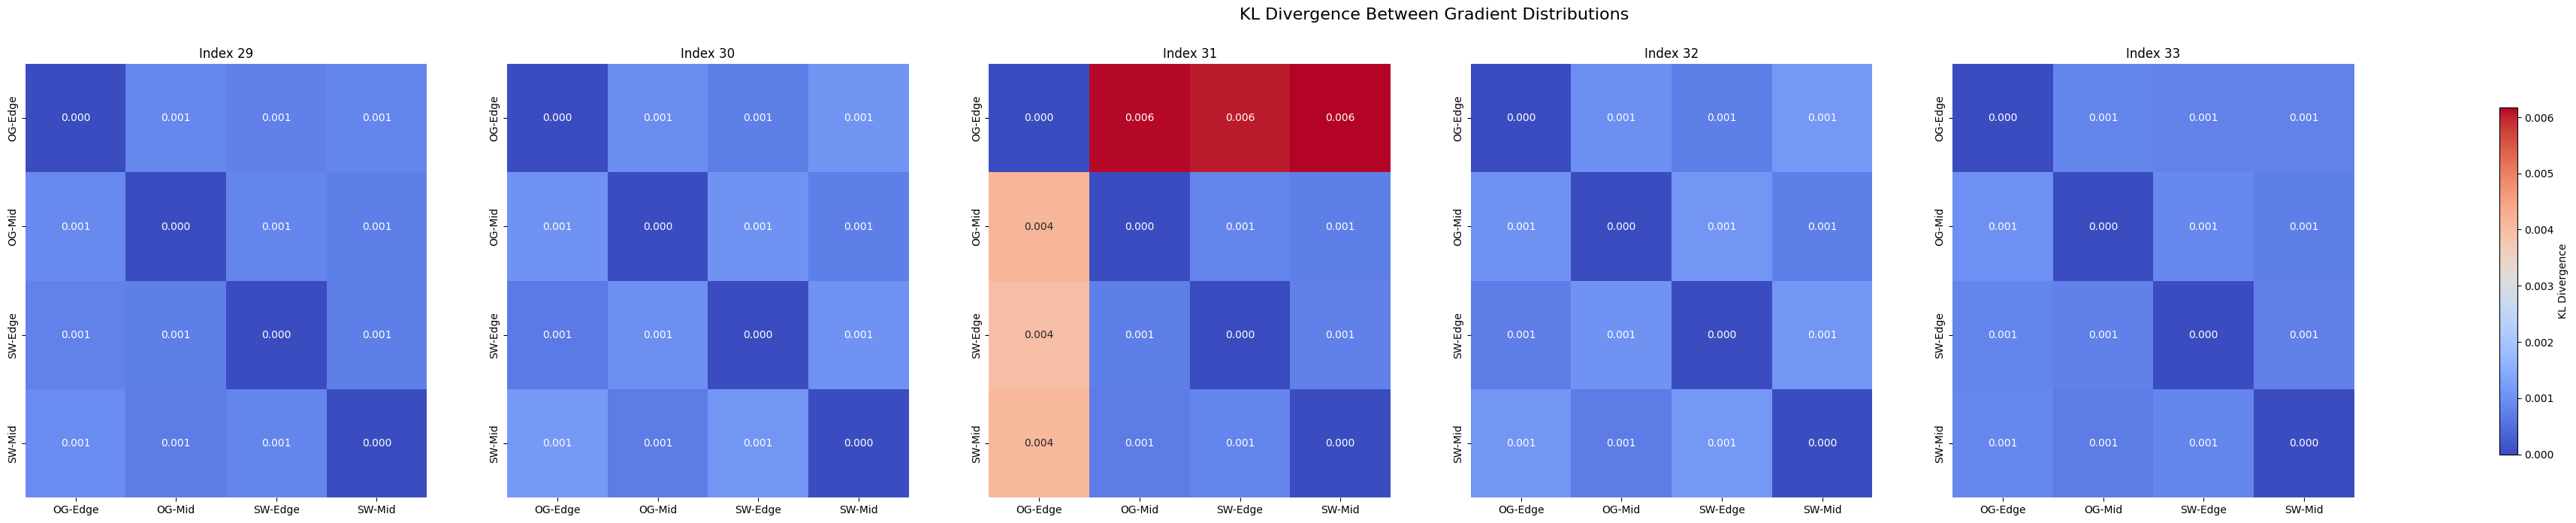

In [22]:
plot_kl_heatmaps_for_range(
    grad_utils_list=[grad_utils_og, grad_utils_sw],
    bin_edges=bin_edges,
    start=29, end=33,
    channels=1,
    labels=["OG", "SW"]
)